# 3D Visualizer Example

In this example, the dataset is generated and a frame of the camera, lidar and radar with the neural network detector is plotted.

In [32]:
import os
import sys
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)
from loaders.rad_cube_loader import RADCUBE_DATASET
from data_preparation import data_preparation
import numpy as np
import re
import matplotlib.pyplot as plt

Here the dataset is generated

In [33]:
params = data_preparation.get_default_params()
params["dataset_path"] = "/media/iroldan/179bc4e0-0daa-4d2d-9271-25c19bcfd403/"
params["train_val_scenes"] = [1, 3, 4, 5, 7]
params["test_scenes"] = [6]
params["use_npy_cubes"] = False
params["bev"] = False
params['label_smoothing'] = False
params["cfar_folder"] = 'radar_ososos'

val_dataset = RADCUBE_DATASET(mode='test', params=params)
paths_dict = val_dataset.data_dict

--------------------------------------------------
test dataset loaded with 2040 samples
scenes used: [6]
--------------------------------------------------


Here the frame number can be changed and the path to each file is gather

In [35]:
frame_number = 10
lidar = paths_dict[frame_number]['gt_path']
cfar = paths_dict[frame_number]['cfar_path']
cam = paths_dict[frame_number]['cam_path']

In [36]:
# Load Lidar
lidar_pc = np.load(lidar)
lidar_pc[:, 1] = -lidar_pc[:, 1]

lidar_pc = data_preparation.transform_point_cloud(lidar_pc, [0, 0, params['azimuth_offset']],
                                                  [-params['x_offset'] / 100, -params['y_offset'] / 100,
                                                   0])

In [37]:
# Load Radar
radar = re.sub(r"radar_.+/", r"network/", cfar)
radar_pc = np.load(radar)
radar_pc = data_preparation.transform_point_cloud(radar_pc, [0, 0, params['azimuth_offset']],
                                                  [-params['x_offset'] / 100, -params['y_offset'] / 100,
                                                   0])
        

In [38]:
# Load Camera
img = plt.imread(cam)
img = img[500:-150,:,:]

The point clouds are cropped to allow a usefull visualization

In [39]:
# Trim for plotting
radar_pc = radar_pc[radar_pc[:, 1] > -30, :]
radar_pc = radar_pc[radar_pc[:, 1] < 30, :]
radar_pc = radar_pc[radar_pc[:, 2] < 10, :]
lidar_pc = lidar_pc[lidar_pc[:, 1] > -30, :]
lidar_pc = lidar_pc[lidar_pc[:, 1] < 30, :]
lidar_pc = lidar_pc[lidar_pc[:, 2] < 10, :]
radar_pc = radar_pc[radar_pc[:, 2] > -1, :]
lidar_pc = lidar_pc[lidar_pc[:, 2] > -1, :]

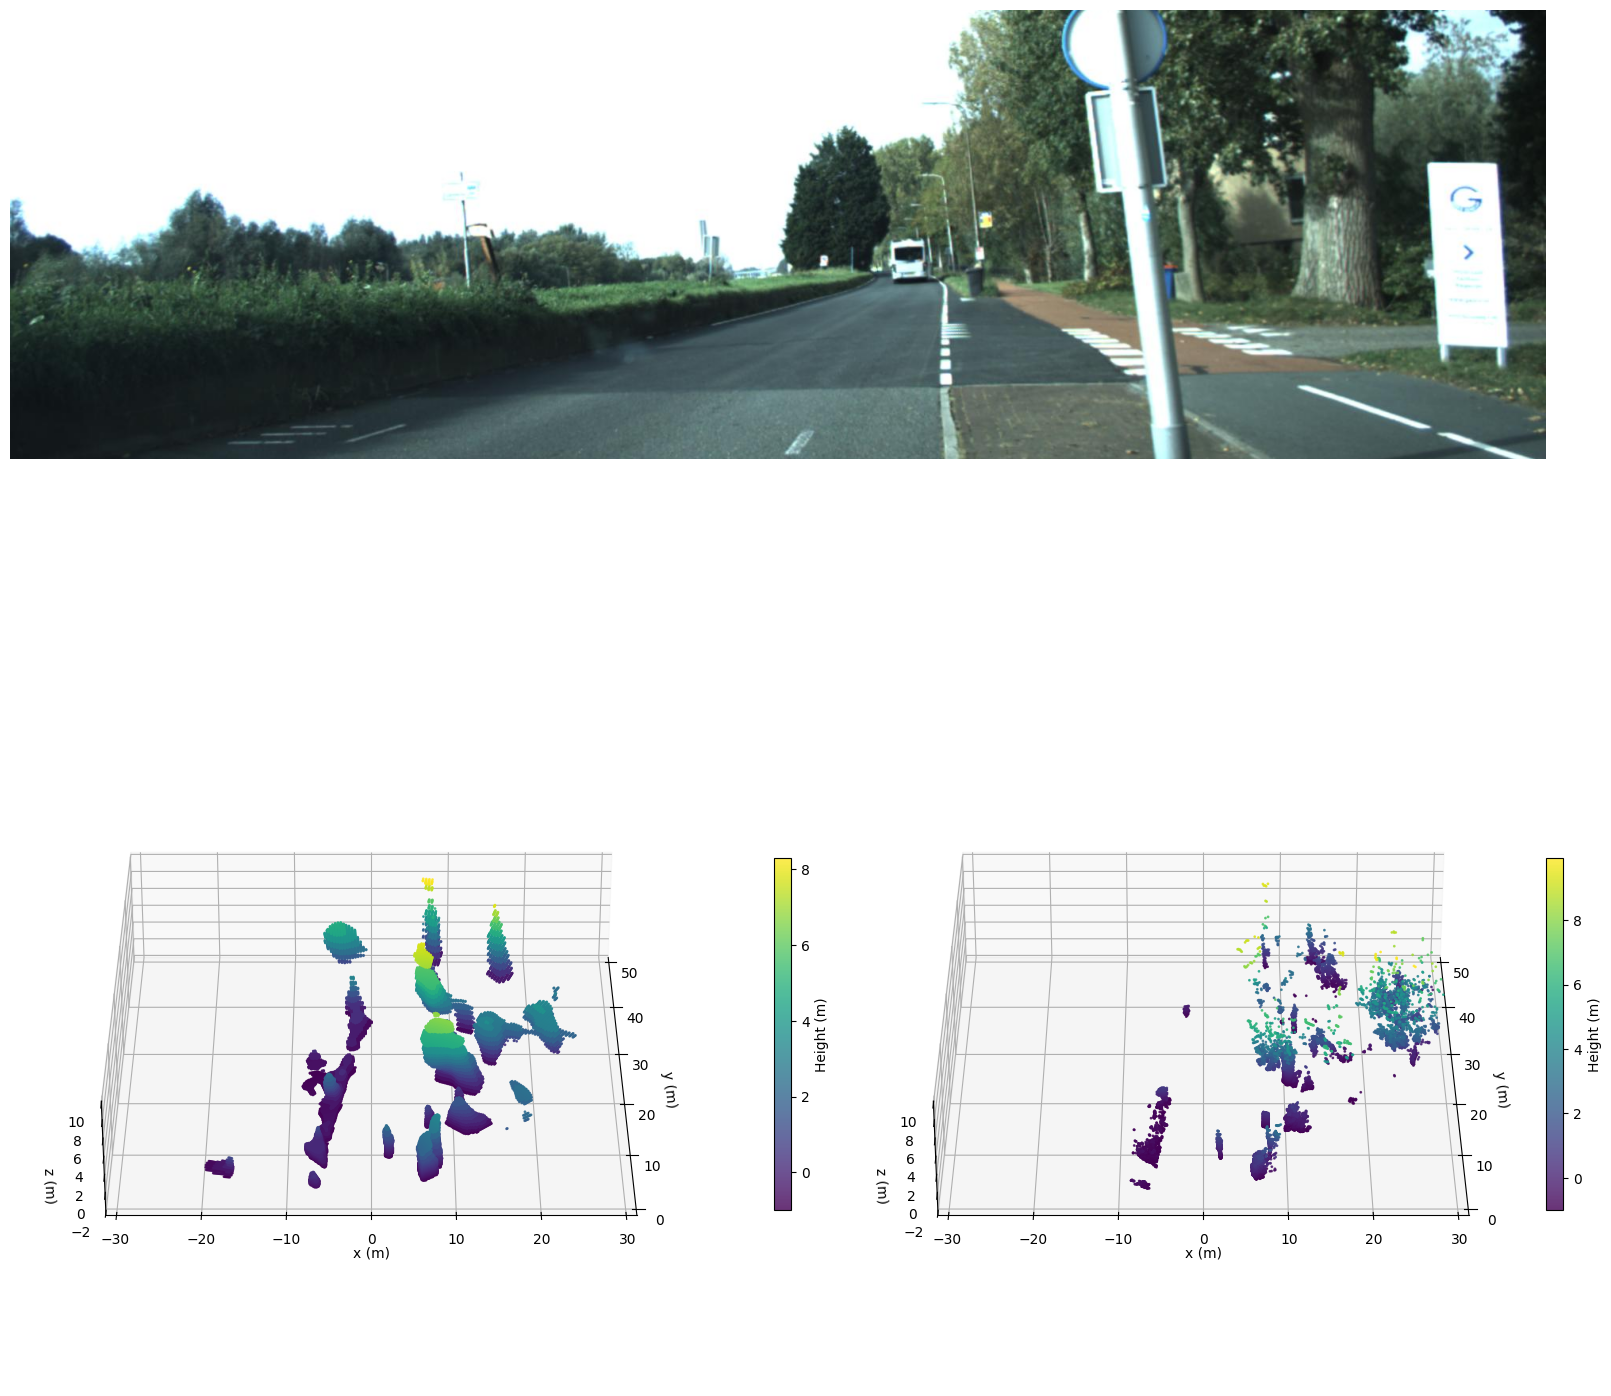

In [44]:
layout = [["camera", "camera"],
    ["radar", "lidar"]
]

fig, axd = plt.subplot_mosaic(layout, figsize=(16, 16), layout='constrained',
                              per_subplot_kw={('radar', 'lidar'): {'projection': '3d'}},
                              gridspec_kw={'wspace': 0.01, 'hspace': 0.01},
                             )



radarplot = axd["radar"].scatter(radar_pc[:, 0], radar_pc[:, 1], radar_pc[:, 2], c=radar_pc[:, 2], alpha=0.8, s=1)
axd["radar"].view_init(elev=30, azim=0)
axd["radar"].set_ylim(-30, 30)
axd["radar"].set_zlim(-2, 10)
axd["radar"].set_xlim(0, 50)
axd["radar"].set_box_aspect([2, 2, 0.5])

axd["radar"].set_xlabel('y (m)')
axd["radar"].set_ylabel('x (m)')
axd["radar"].set_zlabel('z (m)')
axd["radar"].invert_xaxis()
cbar=plt.colorbar(radarplot, fraction=0.025, pad=0)
cbar.set_label('Height (m)')
lidarplot=axd["lidar"].scatter(lidar_pc[:, 0], lidar_pc[:, 1], lidar_pc[:, 2], c=lidar_pc[:, 2], alpha=0.8, s=1)
axd["lidar"].view_init(elev=30, azim=0)
axd["lidar"].set_ylim(-30, 30)
axd["lidar"].set_zlim(-2, 10)
axd["lidar"].set_xlim(0, 50)
axd["lidar"].set_box_aspect([2, 2, 0.5])
axd["lidar"].set_xlabel('y (m)')
axd["lidar"].set_ylabel('x (m)')
axd["lidar"].set_zlabel('z (m)')
axd["lidar"].invert_xaxis()
cbar = plt.colorbar(lidarplot, fraction=0.025, pad=0)
cbar.set_label('Height (m)')


axd["camera"].imshow(img, aspect='0.9')
axd["camera"].axis('off')

plt.show()